# Convolutional Neural Network
### Importing the libraries

In [60]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [61]:
tf.__version__

'2.3.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [62]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [63]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [64]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [65]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [66]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [67]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [68]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [69]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [70]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [71]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [72]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 213s 854ms/step - loss: 0.6791 - accuracy: 0.5730 - val_loss: 0.6118 - val_accuracy: 0.6600
Epoch 2/25
250/250 [==============================] - 58s 231ms/step - loss: 0.6065 - accuracy: 0.6705 - val_loss: 0.5757 - val_accuracy: 0.7070
Epoch 3/25
250/250 [==============================] - 53s 214ms/step - loss: 0.5678 - accuracy: 0.7045 - val_loss: 0.5426 - val_accuracy: 0.7305
Epoch 4/25
250/250 [==============================] - 54s 215ms/step - loss: 0.5392 - accuracy: 0.7318 - val_loss: 0.5104 - val_accuracy: 0.7545
Epoch 5/25
250/250 [==============================] - 54s 214ms/step - loss: 0.5117 - accuracy: 0.7458 - val_loss: 0.5922 - val_accuracy: 0.7005
Epoch 6/25
250/250 [==============================] - 53s 214ms/step - loss: 0.4912 - accuracy: 0.7635 - val_loss: 0.4850 - val_accuracy: 0.7680
Epoch 7/25
250/250 [==============================] - 54s 217ms/step - loss: 0.4761 - accuracy: 0.7709 - val_loss: 0.5379 - val_a

## Part 4 - Making a single prediction

In [73]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset\single_prediction\cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'


In [74]:
print(prediction)

dog


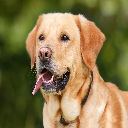

In [76]:
display(image.load_img('dataset\single_prediction\cat_or_dog_1.jpg', target_size = (128, 128)))

    As we can see, the model pridicted this image perfectly.

In [77]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset\single_prediction\cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'


In [78]:
print(prediction)

cat


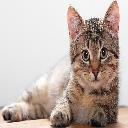

In [80]:
display(image.load_img('dataset\single_prediction\cat_or_dog_2.jpg', target_size = (128, 128)))

    As we can see, the model pridicted this image perfectly.
    